# Bitcoin Price Analysis 

> Diamantopoulos - Pantaleon Odyssefs p3180049 <br/>
> Stogiannidis Ilias - Marios p3180178  <br />
> Department of Informatics  <br />
> Athens University of Economics and Business  <br />
> p3180178@aueb.gr

# Importing the Data

In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
import warnings
warnings.filterwarnings("ignore")

btc_data = pd.read_csv("BTC-USDv2.csv")
btc_data['Date'] = pd.to_datetime(btc_data['Date']) # Convert to datetime

In [179]:
btc_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,7446.830,7446.830,7101.520,7143.580,7143.580,3226249984
1,2017-11-10,7173.730,7312.000,6436.870,6618.140,6618.140,5208249856
2,2017-11-11,6618.610,6873.150,6204.220,6357.600,6357.600,4908680192
3,2017-11-12,6295.450,6625.050,5519.010,5950.070,5950.070,8957349888
4,2017-11-13,5938.250,6811.190,5844.290,6559.490,6559.490,6263249920


In [180]:
btc_data.shape

(1510, 7)

> We are going to check if the prices of Close and Adjacent Close are the same in all instances.

In [181]:
(btc_data['Close'] - btc_data['Adj Close']).sum()

0.0

> Since they are the same we are going to use only one of these two columns.

> We have to check if there are null values or zeros in the dataset

In [182]:
btc_data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

> We see that there are no null values so now we are going to check for zero values

In [183]:
btc_data.query('Open==0 or High==0 or Low==0 or Close==0 or Volume ==0')

,Date,Open,High,Low,Close,Adj Close,Volume


> Time to visualize the data

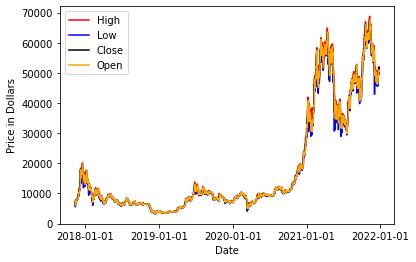

In [184]:
fig, ax = plt.subplots()
plt.plot(btc_data['Date'], btc_data['High'],color="red",label='High')
plt.plot(btc_data['Date'], btc_data['Low'],color="blue",label='Low')
plt.plot(btc_data['Date'], btc_data['Close'],color="black",label='Close')
plt.plot(btc_data['Date'], btc_data['Open'],color="orange",label='Open')


ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())

plt.legend(loc="upper left")

ax.set_xlabel('Date')
ax.set_ylabel('Price in Dollars')
plt.show()




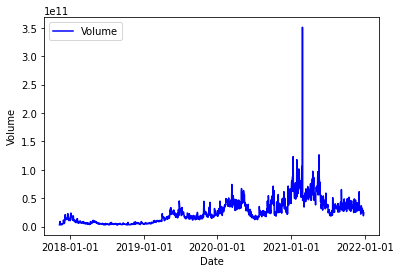

In [185]:
fig, ax = plt.subplots()
plt.plot(btc_data['Date'], btc_data['Volume'],color="blue",label='Volume')

ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())

ax.set_xlabel('Date')
ax.set_ylabel('Volume')

plt.legend(loc="upper left")

plt.show()

> We are going to use the MinMax to normalize the values.

In [186]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1)) #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
X = scaler.fit_transform(btc_data[['Close', 'Adj Close','Open','High','Volume','Low']])
btc = pd.DataFrame(X, columns=[['Close', 'Adj Close','Open','High','Volume','Low']])
btc

,Close,Adj Close,Open,High,Volume,Low
0,0.061,0.061,0.065,0.064,0.001,0.062
1,0.053,0.053,0.061,0.062,0.007,0.051
2,0.049,0.049,0.053,0.055,0.006,0.048
3,0.042,0.042,0.048,0.051,0.017,0.037
4,0.052,0.052,0.042,0.054,0.010,0.042
...,...,...,...,...,...,...
1505,0.739,0.739,0.706,0.734,0.073,0.710
1506,0.740,0.740,0.740,0.741,0.062,0.749
1507,0.734,0.734,0.740,0.731,0.046,0.744
1508,0.740,0.740,0.734,0.731,0.052,0.735


We are going to find the correlation among the variables

In [187]:
corr = btc.corr()
corr

,Close,Adj Close,Open,High,Volume,Low
Close,1.000,1.000,0.998,0.999,0.608,0.999
Adj Close,1.000,1.000,0.998,0.999,0.608,0.999
Open,0.998,0.998,1.000,0.999,0.609,0.999
High,0.999,0.999,0.999,1.000,0.615,0.999
Volume,0.608,0.608,0.609,0.615,1.000,0.598
Low,0.999,0.999,0.999,0.999,0.598,1.000


> Importing the machine learning methods

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import KFold,TimeSeriesSplit
import statsmodels.api as sm
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/58163026/what-is-difference-between-metrics-r2-score-and-acccuracy-score/58163220

## Linear Regression

> Conduct cross validation using the Time split method because we want to control the chronology of the data used for training

model = LinearRegression()
# evaluate model
scores = cross_val_score(model, btc[['Open','High','Volume','Low']], btc['Close'], scoring='r2', cv=cv, n_jobs=-1)
# report performance
scores

In [189]:
X = btc[['Open','High','Volume','Low']]
y = btc['Close']
kf = TimeSeriesSplit(n_splits=10,max_train_size =365) #365 because of the dates
scores =[]
losses = []
i=1

for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtrain,xtest = X.loc[train_index],X.loc[test_index]
    ytrain,ytest = y.loc[train_index],y.loc[test_index]
    
    #model
    lr = LinearRegression()
    lr.fit(xtrain,ytrain)
    score =lr.score(xtest,ytest)
    loss = metrics.mean_squared_error(ytest,lr.predict(xtest)) 
    print('Score:',score)
    print('Mean squared error:',loss) #Elaxistopoiisi sinartisis lathon
    scores.append(score) 
    losses.append(loss)   
    i+=1
    """fig,ax = plt.subplots()
    ax.plot(xtrain,lr.predict(xtrain),color='red')
    plt.show"""

1 of KFold 10
Score: 0.9907528792808834
Mean squared error: 2.2613461109581828e-06
2 of KFold 10
Score: 0.9927226304747311
Mean squared error: 2.6739667829362163e-06
3 of KFold 10
Score: 0.9592762081592875
Mean squared error: 7.50445157832767e-06
4 of KFold 10
Score: 0.9861227803495584
Mean squared error: 5.595529491778805e-06
5 of KFold 10
Score: 0.9868412970618526
Mean squared error: 2.1851490249901053e-06
6 of KFold 10
Score: 0.992954254791606
Mean squared error: 3.3933837497469295e-06
7 of KFold 10
Score: 0.9969458212707586
Mean squared error: 1.7838096589038738e-06
8 of KFold 10
Score: 0.995771516687892
Mean squared error: 0.00020357100644073124
9 of KFold 10
Score: 0.9938222110137763
Mean squared error: 0.00015522649339473843
10 of KFold 10
Score: 0.9885469941353374
Mean squared error: 0.00013174246602562566


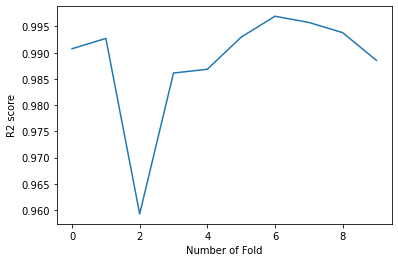

In [190]:
#Plotting KFold Linear Regression R2 scores
fig, ax = plt.subplots()
plt.plot(scores)
ax.set_xlabel('Number of Fold')
ax.set_ylabel('R2 score')
plt.show()

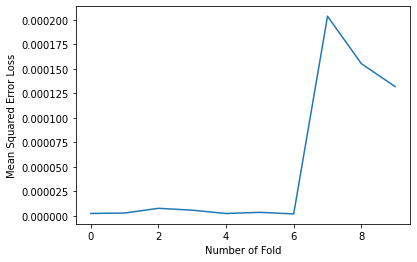

In [191]:
#Plotting KFold Linear Regression ROC scores
fig, ax = plt.subplots()
plt.plot(losses)
ax.set_xlabel('Number of Fold')
ax.set_ylabel('Mean Squared Error Loss')
plt.show()

## Logistic Regression

> Creating a new column that contains the difference of the openning with the closing price.

In [192]:
btc_data['PosNegClosing'] = btc_data['Open']- btc_data['Close']

> Then putting to all negative values the value 0 and to all posivite the value 1 in order to have a column with binary data.

In [193]:
btc_data['PosNegClosing'].mask(btc_data['PosNegClosing']>0,1,inplace=True)

In [194]:
btc_data['PosNegClosing'].mask(btc_data['PosNegClosing']<0,0,inplace=True)

In [195]:
btc_data['PosNegClosing'].max()

1.0

In [196]:
btc_data['PosNegClosing'].min()

0.0

> Put our data to X and Y dataframes

In [197]:
X = btc[['Open','High','Volume','Low','Close']]
y = btc_data['PosNegClosing']

> Conduct Logistic regression to 10 different kfolds and report their performances.

In [198]:
kf = TimeSeriesSplit(n_splits=10,max_train_size =365)
scores =[]
losses = []
i=1

for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtrain,xtest = X.loc[train_index],X.loc[test_index]
    ytrain,ytest = y.loc[train_index],y.loc[test_index]
    
    #model
    lr = LogisticRegression()
    lr.fit(xtrain,ytrain)
    score = lr.score(xtest,ytest)
    loss = metrics.log_loss(ytest,lr.predict(xtest))
    print('Score:',score)
    print('Log Loss:',loss) #we cant use mse https://www.analyticsvidhya.com/blog/2020/11/binary-cross-entropy-aka-log-loss-the-cost-function-used-in-logistic-regression/
    scores.append(score) 
    losses.append(loss)   
    i+=1
   

1 of KFold 10
Score: 0.5474452554744526
Log Loss: 15.630687127623814
2 of KFold 10
Score: 0.48175182481751827
Log Loss: 17.899657839698236
3 of KFold 10
Score: 0.5985401459854015
Log Loss: 13.865932129343706
4 of KFold 10
Score: 0.5109489051094891
Log Loss: 16.891226412109603
5 of KFold 10
Score: 0.48905109489051096
Log Loss: 17.647549982801078
6 of KFold 10
Score: 0.5036496350364964
Log Loss: 17.14333426900676
7 of KFold 10
Score: 0.40145985401459855
Log Loss: 20.673322856729577
8 of KFold 10
Score: 0.5766423357664233
Log Loss: 14.62225570003518
9 of KFold 10
Score: 0.48175182481751827
Log Loss: 17.899657839698236
10 of KFold 10
Score: 0.6058394160583942
Log Loss: 13.61396434790877


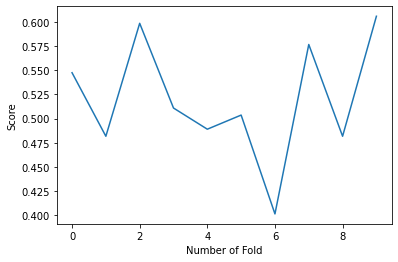

In [199]:
#Plotting KFold Logistic Regression ROC scores
fig, ax = plt.subplots()
plt.plot(scores)
ax.set_xlabel('Number of Fold')
ax.set_ylabel('Score')
plt.show()

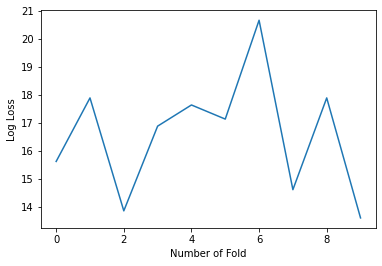

In [200]:
fig, ax = plt.subplots()
plt.plot(losses)
ax.set_xlabel('Number of Fold')
ax.set_ylabel('Log Loss')
plt.show()

## Neural Network

> Importing tensorflow

In [201]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x) #avoid scientific notation
import datetime
import math
from matplotlib import pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [202]:
# number of past observations to be considered for the LSTM training and prediction
n_past = 50

# number of future datapoints to predict (if higher than 1, the model switch to Multi-Step)
n_future = 1

# activation function used for the RNN (softsign, relu, sigmoid)
activation = 'relu'

# dropout for the hidden layers
dropout = 0.2

# number of hidden layers
n_layers = 2

# number of neurons of the hidden layers
n_neurons = 20

# features to be considered for training (if only one is Close, then its Univariate, if more, then it's Multivariate)
features = ['Close', 'Volume']
#features = ['Close']

# number of inputs features (if higher than 1, )
n_features = len(features)

# patience for the early stopping (number of epochs)
patience = 25

# optimizer (adam, RMSprop)
optimizer='adam'

In [203]:
df = btc_data.set_index('Date')[features]
df = df.set_index(pd.to_datetime(df.index))
df.dropna(inplace=True)

In [204]:
training_set = df.values
print('training_set.shape:\t', training_set.shape)

training_set.shape:	 (1510, 2)


In [205]:
# scale
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
print('training_set_scaled.shape: ', training_set_scaled.shape)
training_set_scaled

training_set_scaled.shape:  (1510, 2)


array([[0.06073083, 0.00086937],
       [0.05256296, 0.00656405],
       [0.0485129 , 0.00570333],
       ...,
       [0.73360872, 0.04627854],
       [0.73951041, 0.05183451],
       [0.75376818, 0.06094721]])

In [206]:
# creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []

for i in range(n_past, len(training_set_scaled) - n_future + 1):
    X_train.append(training_set_scaled[i-n_past:i, :])
    y_train.append(training_set_scaled[i:i+n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((1460, 50, 2), (1460, 1))

In [207]:
# reshaping (needed to fit RNN)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], n_features))
X_train.shape

(1460, 50, 2)

> Building the model

In [208]:
# Building the RNN

# Initialising the RNN
regressor = Sequential()

# Input layer
regressor.add(LSTM(units=n_past, return_sequences=True, activation=activation, input_shape=(X_train.shape[1], n_features))) 
#regressor.add(LSTM(units=neurons, return_sequences=True, activation=activation, input_shape=(X_train.shape[1], 1))) 

# Hidden layers
for _ in range(n_layers):
    regressor.add(Dropout(dropout))
    regressor.add(LSTM(units=n_neurons, return_sequences=True, activation=activation))

# Last hidden layer (changing the return_sequences)
regressor.add(Dropout(dropout))
regressor.add(LSTM(units=n_neurons, return_sequences=False, activation=activation))

# Adding the output layer
regressor.add(Dense(units=n_future))

# Compiling the RNN
regressor.compile(optimizer=optimizer, loss='mean_squared_error')

# Model summary
regressor.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 50, 50)            10600     
                                                                 
 dropout_15 (Dropout)        (None, 50, 50)            0         
                                                                 
 lstm_21 (LSTM)              (None, 50, 20)            5680      
                                                                 
 dropout_16 (Dropout)        (None, 50, 20)            0         
                                                                 
 lstm_22 (LSTM)              (None, 50, 20)            3280      
                                                                 
 dropout_17 (Dropout)        (None, 50, 20)            0         
                                                                 
 lstm_23 (LSTM)              (None, 20)               

In [209]:
# Adding early stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=patience)

In [210]:
# Fitting the RNN to the Training set
res = regressor.fit(X_train, y_train
                    , batch_size=32
                    , epochs=750
                    , validation_split=0.1
                    , callbacks=[early_stop]
                   )

Epoch 1/750
42/42 [==============================] - 8s 65ms/step - loss: 0.0359 - val_loss: 0.1442
Epoch 2/750
42/42 [==============================] - 2s 51ms/step - loss: 0.0069 - val_loss: 0.0191
Epoch 3/750
42/42 [==============================] - 2s 47ms/step - loss: 0.0031 - val_loss: 0.0093
Epoch 4/750
42/42 [==============================] - 2s 47ms/step - loss: 0.0028 - val_loss: 0.0107
Epoch 5/750
42/42 [==============================] - 2s 47ms/step - loss: 0.0026 - val_loss: 0.0147
Epoch 6/750
42/42 [==============================] - 2s 50ms/step - loss: 0.0025 - val_loss: 0.0130
Epoch 7/750
42/42 [==============================] - 2s 54ms/step - loss: 0.0022 - val_loss: 0.0069
Epoch 8/750
42/42 [==============================] - 2s 48ms/step - loss: 0.0022 - val_loss: 0.0127
Epoch 9/750
42/42 [==============================] - 2s 49ms/step - loss: 0.0020 - val_loss: 0.0077
Epoch 10/750
42/42 [==============================] - 2s 42ms/step - loss: 0.0026 - val_loss: 0.0109

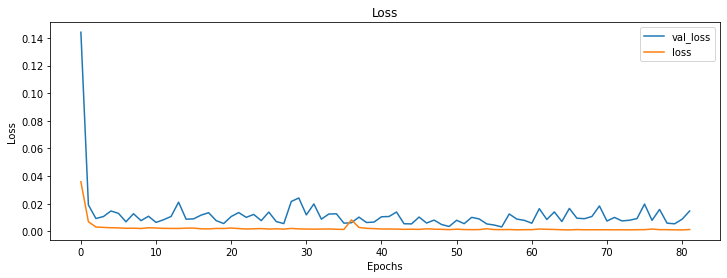

In [211]:
# Plotting Loss/MSE

results = res

history = results.history
plt.figure(figsize=(12,4))
plt.plot(history['val_loss'])
plt.plot(history['loss'])
plt.legend(['val_loss', 'loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [212]:
def dummy_invscaler(y, n_features):
    '''
    Since the scaler was trained into 2 features, it needs two features to perform the inverse scaleer.
    For that purpose, this function will create a dummy array and concatenate it to the y_pred/y_true.
    That dummy of ones will be drop after performing the inverse_transform.
    INPUTS: array 'y', shape (X,)
    '''
    y = np.array(y).reshape(-1,1)
    if n_features>1:
        dummy = np.ones((len(y), n_features-1))
        y = np.concatenate((y, dummy), axis=1)
        y = sc.inverse_transform(y)
        y = y[:,0]
    else:
        y = sc.inverse_transform(y)
    return y

In [215]:
# Validation
# getting the predictions
y_pred = regressor.predict(X_train[-1].reshape(1, n_past, n_features)).tolist()[0]
y_pred = dummy_invscaler(y_pred, n_features)

"""# creating a DF of the predicted prices
y_pred_df = pd.DataFrame(y_pred, 
                         index=df[['Close']].tail(n_future).index, 
                         columns=df[['Close']].columns)"""

# getting the true values
y_true_df = df[['Close']].tail(n_past)
y_true = y_true_df.tail(n_future).values

print('y_pred:\n', y_pred [0])
print('y_true:\n', y_true[0][0])



# The bellow commented code is used to create a graph of the predicted values vs the actual values
# It is used only if we predict more than one values
"""
# plotting the results
plt.figure(figsize=(16,5))
plt.plot(y_pred_df, label='Predicted')
plt.plot(y_true_df, label='True')

plt.title('BTC price Predicted vs True')
plt.legend()
plt.show()"""

y_pred:
 43496.857113205304
y_true:
 51726.71875


"\n# plotting the results\nplt.figure(figsize=(16,5))\nplt.plot(y_pred_df, label='Predicted')\nplt.plot(y_true_df, label='True')\n\nplt.title('BTC price Predicted vs True')\nplt.legend()\nplt.show()"